In [1]:
import pandas as pd
import missingno as msno

# Question 1

- importing the data (vinci stock , pernod ricard stock , cac40 index , treasury Bill)

In [28]:
# import data
pernod_ricard_stock  = pd.read_csv('RI.PA.csv')
vinci_stock  = pd.read_csv('DG.PA.csv')
cac40_index  = pd.read_csv('^FCHI.csv')
t_bill_rates = pd.read_csv('^IRX.csv') 

- sorting data by date

In [29]:
pernod_ricard_stock.sort_values(['Date'],inplace=True)
vinci_stock.sort_values(['Date'],inplace=True)
cac40_index.sort_values(['Date'],inplace=True)
t_bill_rates.sort_values(['Date'],inplace=True)

- Checking for missing values \
we use missingo library to vizualize missing data ( missing data points are represented by white hozizontale lines )

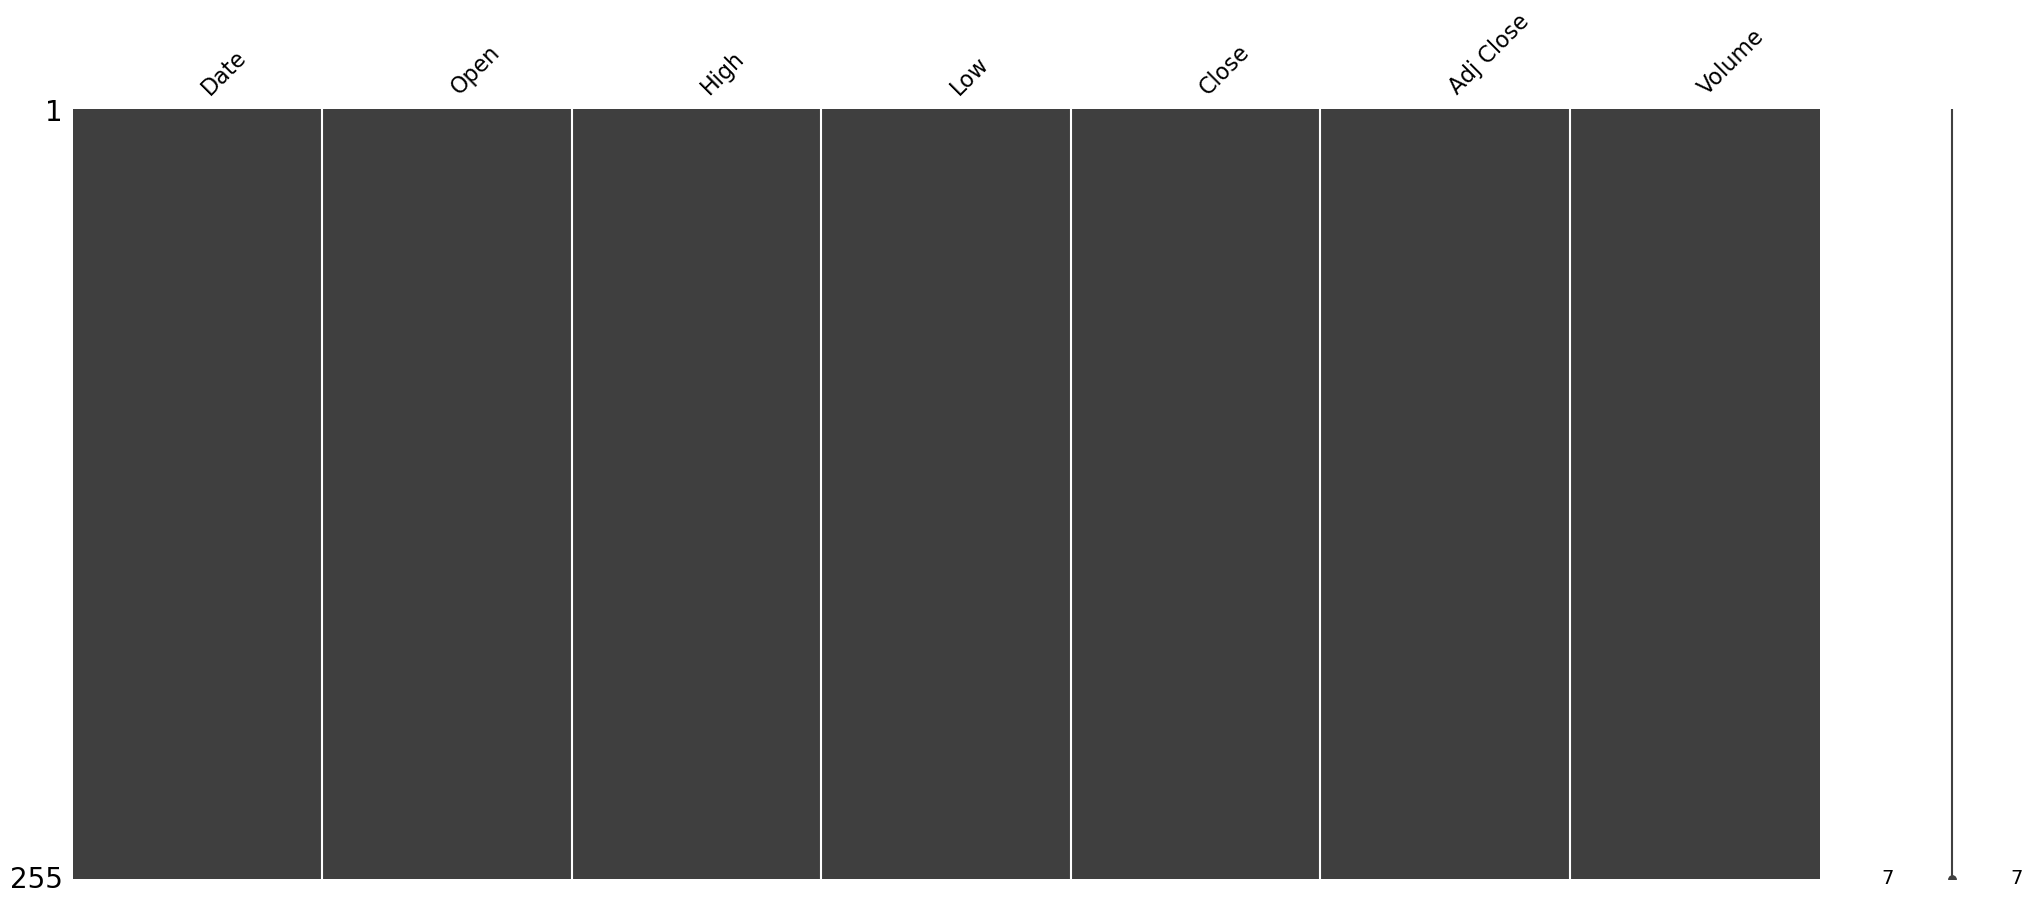

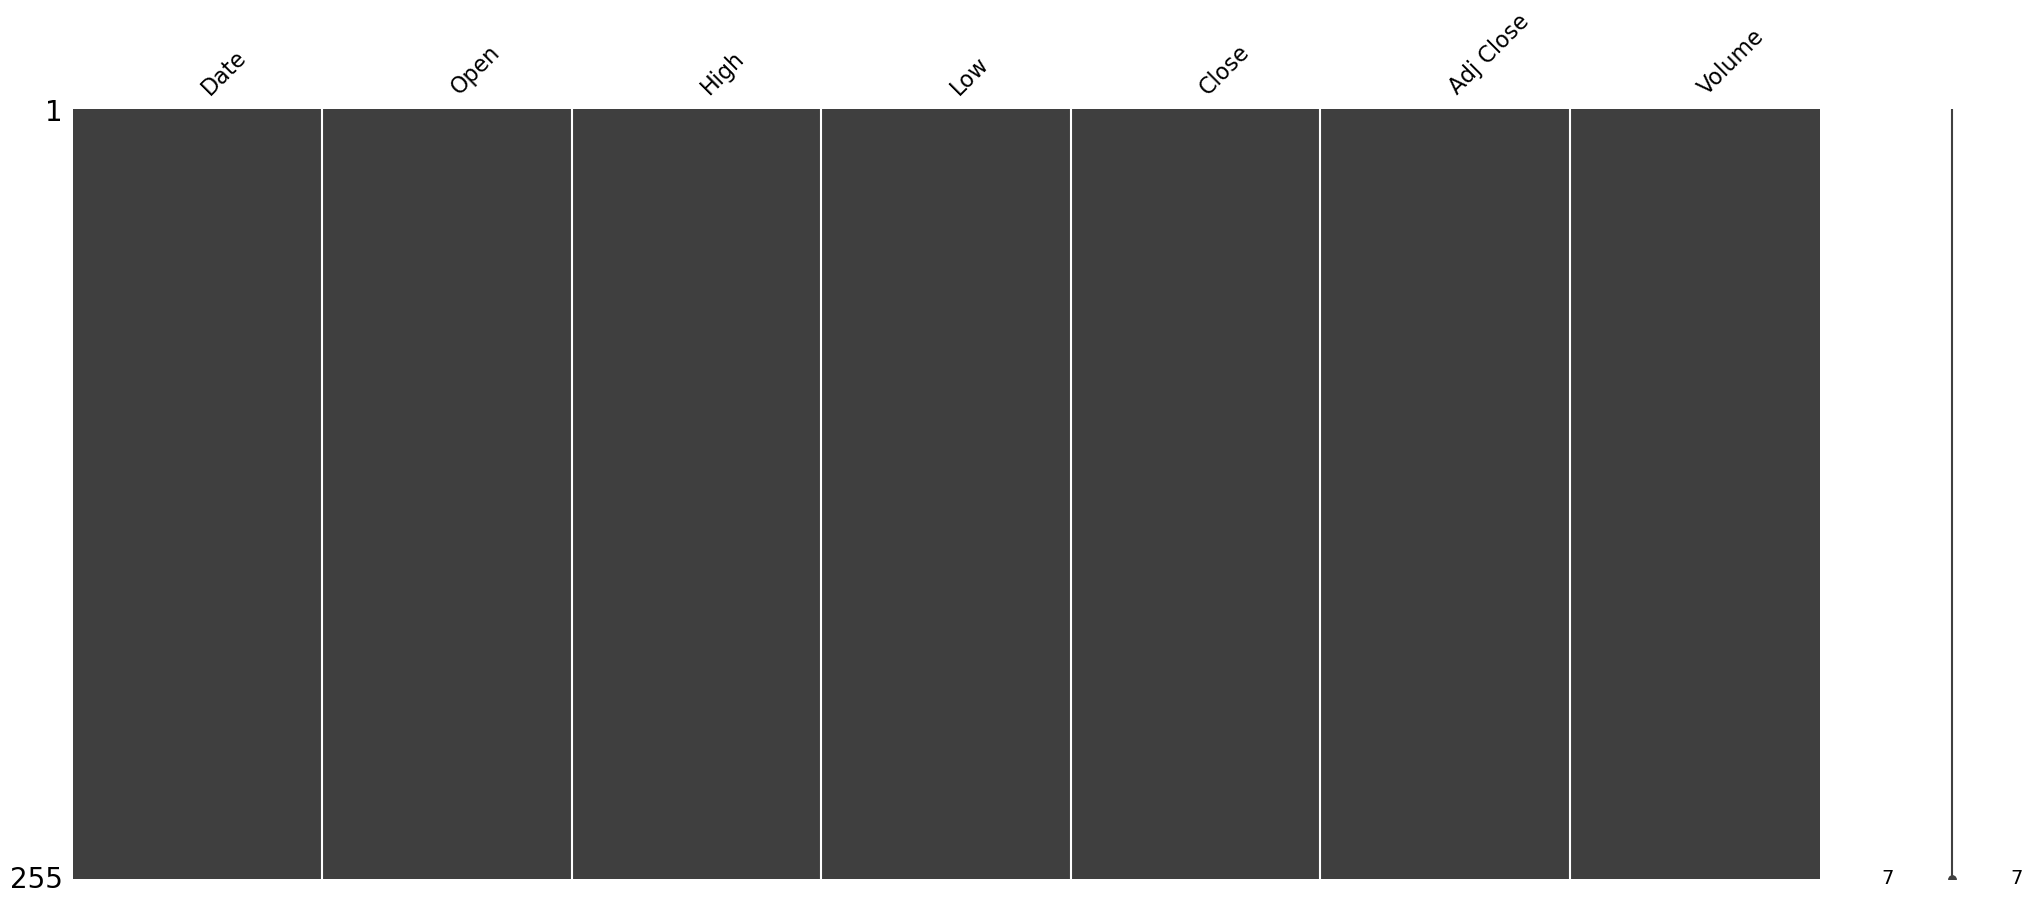

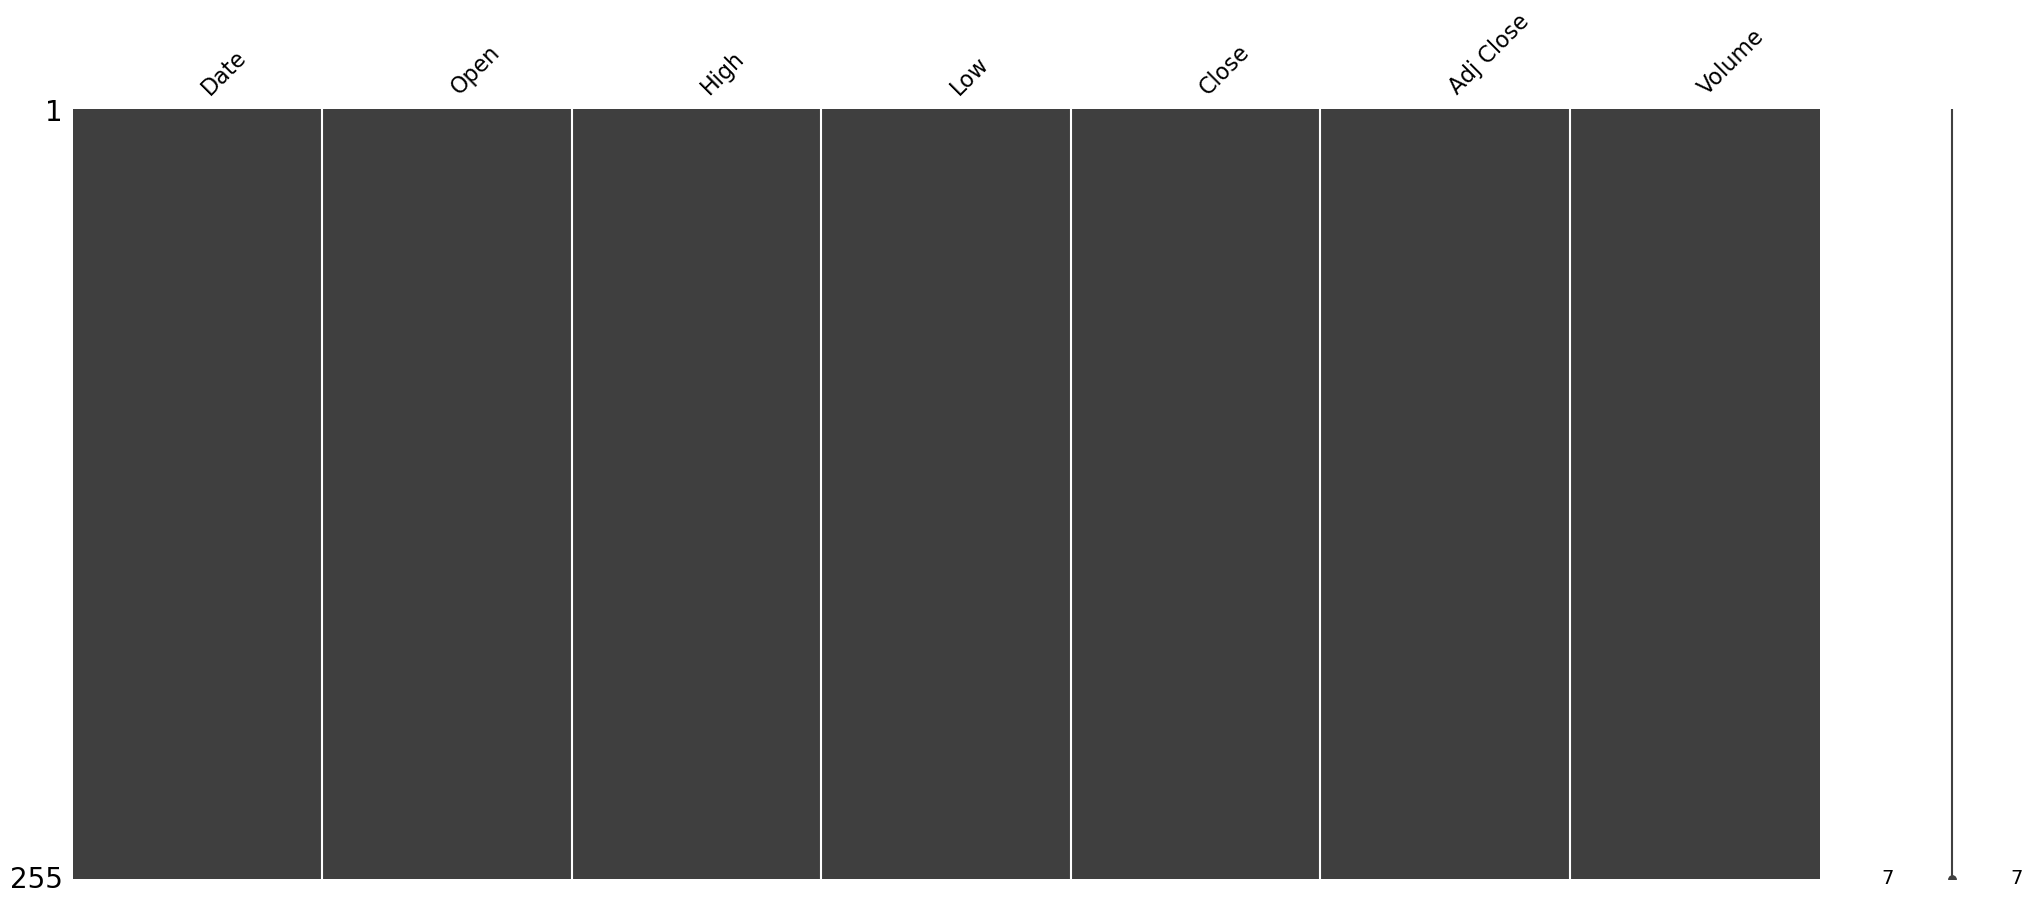

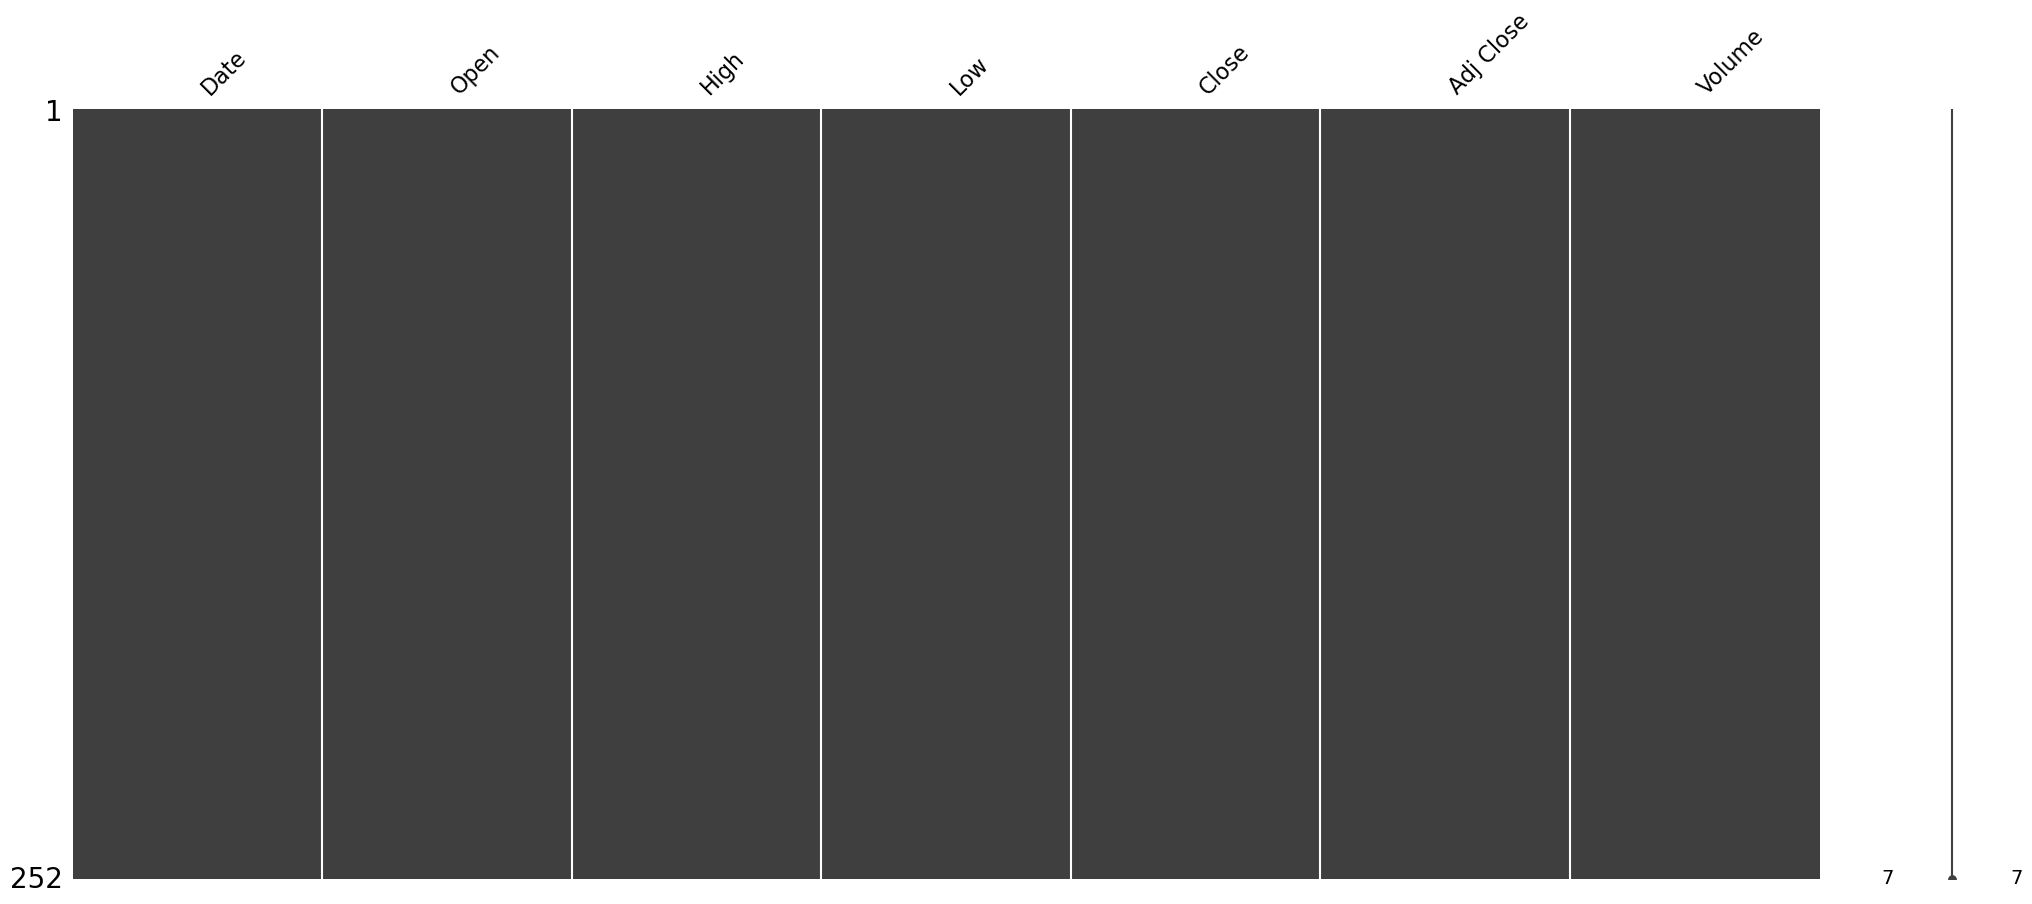

In [30]:
for stock in [pernod_ricard_stock,vinci_stock,cac40_index,t_bill_rates]:
    msno.matrix(stock) 

=> interpretation : Initial datasets have no missing data

- Making sure dates coincides for all datasets 

In [ ]:
# converting date columns into datetime first 
for df in [pernod_ricard_stock, vinci_stock, cac40_index, t_bill_rates]:
    df["Date"] = pd.to_datetime(df["Date"])

# Merge datasets on "Date"
df_merged = pernod_ricard_stock.merge(vinci_stock, on="Date", how="outer", suffixes=('_pernod', '_vinci')) \
                               .merge(cac40_index, on="Date", how="outer") \
                               .merge(t_bill_rates, on="Date", how="outer",suffixes=('_cac40', '_t_bill'))
df_merged.sort_values(['Date'],inplace=True)
df_merged.head()

,Date,Open_pernod,High_pernod,Low_pernod,Close_pernod,Adj Close_pernod,Volume_pernod,Open_vinci,High_vinci,Low_vinci,...,Low_cac40,Close_cac40,Adj Close_cac40,Volume_cac40,Open_t_bill,High_t_bill,Low_t_bill,Close_t_bill,Adj Close_t_bill,Volume_t_bill
0,2017-10-24,128.000000,128.500000,127.900002,128.149994,126.143349,399362.0,80.300003,80.989998,80.300003,...,5377.859863,5394.799805,5394.799805,74560600.0,1.098,1.098,1.098,1.098,1.098,0.0
1,2017-10-25,127.699997,128.149994,125.699997,126.000000,124.027023,544507.0,81.459999,81.610001,80.379997,...,5364.160156,5374.890137,5374.890137,80466800.0,1.095,1.098,1.080,1.083,1.083,0.0
2,2017-10-26,125.650002,127.050003,125.650002,126.599998,124.617622,508267.0,80.910004,83.129997,80.760002,...,5375.259766,5455.399902,5455.399902,90950700.0,1.080,1.083,1.075,1.080,1.080,0.0
3,2017-10-27,127.449997,129.000000,127.099998,128.050003,126.044930,542038.0,83.010002,83.410004,82.410004,...,5470.240234,5494.129883,5494.129883,95585200.0,1.075,1.075,1.073,1.073,1.073,0.0
4,2017-10-30,127.750000,129.199997,127.599998,128.750000,126.733963,324561.0,82.949997,84.070000,82.860001,...,5487.290039,5493.629883,5493.629883,67428800.0,1.073,1.080,1.073,1.075,1.075,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2018-10-17,130.800003,131.149994,128.350006,129.899994,129.899994,641667.0,78.820000,79.099998,78.099998,...,5117.229980,5144.950195,5144.950195,90604000.0,2.260,2.270,2.260,2.260,2.260,0.0
251,2018-10-18,130.699997,132.149994,129.750000,130.800003,130.800003,754182.0,78.339996,78.980003,77.660004,...,5115.310059,5116.790039,5116.790039,99240000.0,2.258,2.260,2.255,2.255,2.255,0.0
252,2018-10-19,131.699997,132.899994,130.449997,132.199997,132.199997,790936.0,78.040001,78.220001,77.160004,...,5057.450195,5084.660156,5084.660156,130238900.0,2.255,2.260,2.255,2.260,2.260,0.0
253,2018-10-22,133.949997,134.300003,132.449997,132.649994,132.649994,413017.0,77.959999,78.419998,76.720001,...,5052.240234,5053.310059,5053.310059,74610400.0,2.258,2.260,2.258,2.258,2.258,0.0


<Axes: >

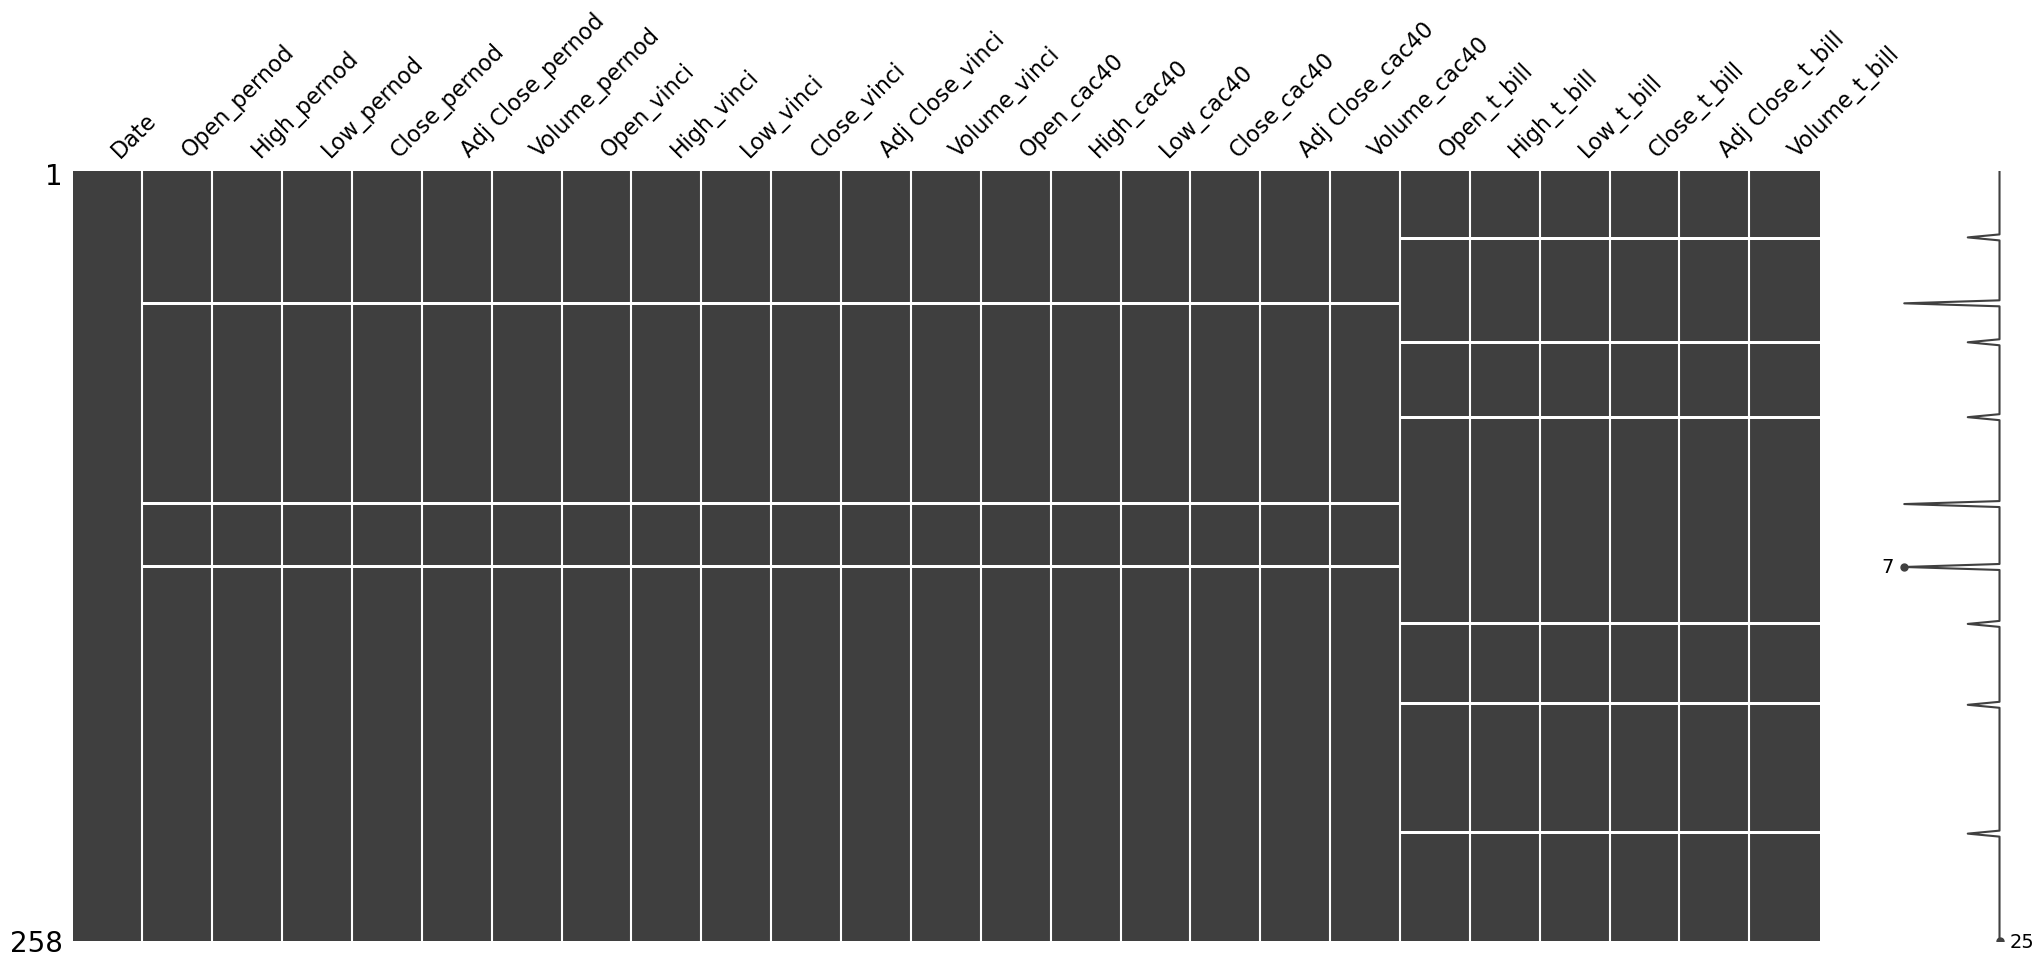

In [19]:
msno.matrix(df_merged)

In [21]:
# count of missing data
df_merged.isnull().sum()

Date                0
Open_pernod         3
High_pernod         3
Low_pernod          3
Close_pernod        3
Adj Close_pernod    3
Volume_pernod       3
Open_vinci          3
High_vinci          3
Low_vinci           3
Close_vinci         3
Adj Close_vinci     3
Volume_vinci        3
Open_cac40          3
High_cac40          3
Low_cac40           3
Close_cac40         3
Adj Close_cac40     3
Volume_cac40        3
Open_t_bill         6
High_t_bill         6
Low_t_bill          6
Close_t_bill        6
Adj Close_t_bill    6
Volume_t_bill       6
dtype: int64

we can observe some missing values in some specific dates especially for The ***5-week interest rate from the US Treasury***

- handling missing data\
we will handle missing data by using the method of Forward Fill (fill the missing data with the last available value) , which is a robust method in handling missing data for stock market and financial data

In [25]:
df_merged.ffill(inplace=True)
df_merged.head()

,Date,Open_pernod,High_pernod,Low_pernod,Close_pernod,Adj Close_pernod,Volume_pernod,Open_vinci,High_vinci,Low_vinci,...,Low_cac40,Close_cac40,Adj Close_cac40,Volume_cac40,Open_t_bill,High_t_bill,Low_t_bill,Close_t_bill,Adj Close_t_bill,Volume_t_bill
0,2017-10-24,128.000000,128.500000,127.900002,128.149994,126.143349,399362.0,80.300003,80.989998,80.300003,...,5377.859863,5394.799805,5394.799805,74560600.0,1.098,1.098,1.098,1.098,1.098,0.0
1,2017-10-25,127.699997,128.149994,125.699997,126.000000,124.027023,544507.0,81.459999,81.610001,80.379997,...,5364.160156,5374.890137,5374.890137,80466800.0,1.095,1.098,1.080,1.083,1.083,0.0
2,2017-10-26,125.650002,127.050003,125.650002,126.599998,124.617622,508267.0,80.910004,83.129997,80.760002,...,5375.259766,5455.399902,5455.399902,90950700.0,1.080,1.083,1.075,1.080,1.080,0.0
3,2017-10-27,127.449997,129.000000,127.099998,128.050003,126.044930,542038.0,83.010002,83.410004,82.410004,...,5470.240234,5494.129883,5494.129883,95585200.0,1.075,1.075,1.073,1.073,1.073,0.0
4,2017-10-30,127.750000,129.199997,127.599998,128.750000,126.733963,324561.0,82.949997,84.070000,82.860001,...,5487.290039,5493.629883,5493.629883,67428800.0,1.073,1.080,1.073,1.075,1.075,0.0


In [24]:
# verify that there is no more missing values 
df_merged.isnull().sum()

Date                0
Open_pernod         0
High_pernod         0
Low_pernod          0
Close_pernod        0
Adj Close_pernod    0
Volume_pernod       0
Open_vinci          0
High_vinci          0
Low_vinci           0
Close_vinci         0
Adj Close_vinci     0
Volume_vinci        0
Open_cac40          0
High_cac40          0
Low_cac40           0
Close_cac40         0
Adj Close_cac40     0
Volume_cac40        0
Open_t_bill         0
High_t_bill         0
Low_t_bill          0
Close_t_bill        0
Adj Close_t_bill    0
Volume_t_bill       0
dtype: int64

# Question 2 

In [27]:
# Calculate Daily Returns using the percentage change method
pernod_ricard_stock['Daily Return'] = pernod_ricard_stock['Close'].pct_change()
vinci_stock['Daily Return'] = vinci_stock['Close'].pct_change()
cac40_index['Daily Return'] = cac40_index['Close'].pct_change()

# Calculate Global Returns using the formula: (Final Price / Initial Price) - 1
global_return_pernod_ricard = (pernod_ricard_stock['Close'].iloc[-1] / pernod_ricard_stock['Close'].iloc[0]) - 1
global_return_vinci = (vinci_stock['Close'].iloc[-1] / vinci_stock['Close'].iloc[0]) - 1
global_return_cac40 = (cac40_index['Close'].iloc[-1] / cac40_index['Close'].iloc[0]) - 1

# Display the global returns
print(f"Pernod Ricard Global Return: {global_return_pernod_ricard:.2%}")
print(f"Vinci Global Return: {global_return_vinci:.2%}")
print(f"CAC40 Global Return: {global_return_cac40:.2%}")


Pernod Ricard Global Return: 1.05%
Vinci Global Return: -7.51%
CAC40 Global Return: -7.92%


Comment :
- Pernod Ricard delivered a positive return of 1.05%, showing resilience and outperforming both the market and Vinci stock.
- Vinci had a negative return of -7.51%, which is close to the market performance but still slightly better than the CAC40.
- The CAC40 index fell by -7.92%, indicating a challenging period for the broader marke

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

# Question 11

# Question 12